In [1]:
# Setup

import sys
import cPickle as pickle
import numpy as np
import time
import matplotlib.pyplot as plt

data_path = 'data/linear_svm.pkl'
with open(data_path, 'r') as f:
    datadict = pickle.load(f)
    X = datadict['X']
    y = datadict['y']

W = np.random.randn(10, 3073) * 0.0001 

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
# Check implementation with numeric method

from files.linear_svm import *
from files.gradient_check import grad_check

loss, grad = svm_loss_naive(W, X, y, 0)
f = lambda w: svm_loss_naive(w, X, y, 0.0)[0]

grad_numerical = grad_check(f, W, grad, 10)

numerical: 39.808224 analytic: 39.808224, relative error: 5.337787e-13
numerical: 13.928636 analytic: 13.928636, relative error: 1.542036e-11
numerical: -14.270909 analytic: -14.270909, relative error: 6.172540e-12
numerical: 29.238613 analytic: 29.238613, relative error: 2.923534e-12
numerical: -14.242431 analytic: -14.242431, relative error: 9.155282e-12
numerical: 16.008285 analytic: 16.008285, relative error: 4.019480e-12
numerical: -8.616771 analytic: -8.616771, relative error: 1.480392e-11
numerical: -8.466446 analytic: -8.466446, relative error: 2.085441e-11
numerical: 17.190476 analytic: 17.190476, relative error: 4.395716e-12
numerical: -24.807526 analytic: -24.807526, relative error: 3.308177e-13


In [3]:
# Compare naive to vectorized

from files.linear_svm import *
start = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X, y, 0.00001)
stop = time.time()
naive_time = stop - start

print 'Naive loss: %e computed in %fs' % (loss_naive, stop - start)

start = time.time()
loss_vectorized, grad_vectorized = svm_loss_vectorized(W, X, y, 0.00001)
stop = time.time()
vectorized_time = stop - start

grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')

print 'Vectorized loss: %e computed in %fs' % (loss_vectorized, stop - start)
# The loss difference should be 0, but your vectorized implementation should be much faster.
print 'Loss difference: %f. Vectorized version is %fx faster' % (loss_naive - loss_vectorized, naive_time/vectorized_time)
print 'Gradient difference: %f' % grad_difference

Naive loss: 9.060470e+00 computed in 0.023291s
Vectorized loss: 9.060470e+00 computed in 0.002181s
Loss difference: -0.000000. Vectorized version is 10.680004x faster
Gradient difference: 0.000000


In [4]:
# Train a classifier

from files.linear_classifier import LinearSVM
svm = LinearSVM()
start = time.time()
loss_hist = svm.train(X, y, learning_rate=1e-7, reg=5e4, num_iters=1500)
stop = time.time()
print 'Training time %fs' % (stop - start)

iteration 0 / 1500: loss 790.650909
iteration 100 / 1500: loss 285.379775
iteration 200 / 1500: loss 105.411393
iteration 300 / 1500: loss 39.948695
iteration 400 / 1500: loss 15.943940
iteration 500 / 1500: loss 7.367374
iteration 600 / 1500: loss 4.001879
iteration 700 / 1500: loss 2.894991
iteration 800 / 1500: loss 2.372957
iteration 900 / 1500: loss 2.322053
iteration 1000 / 1500: loss 2.277841
iteration 1100 / 1500: loss 2.331285
iteration 1200 / 1500: loss 2.206858
iteration 1300 / 1500: loss 2.182395
iteration 1400 / 1500: loss 2.202493
Training time 3.776378s


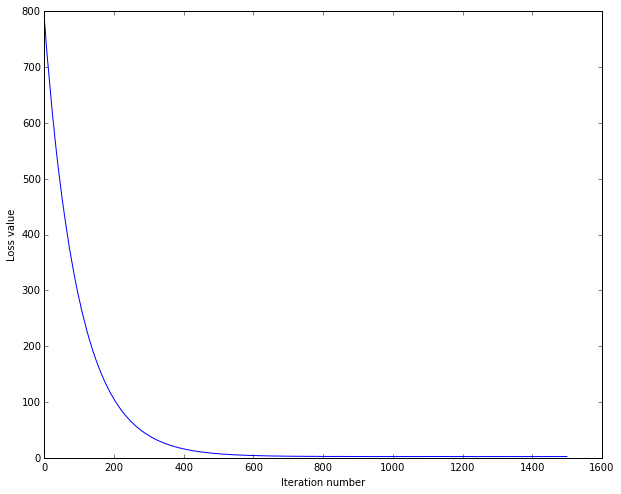

In [5]:
# Plot loss history

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

Starting training with reg: 5.000000e+04, lr: 1.000000e-06 ...
loss was: 3.312633

Starting training with reg: 5.000000e+05, lr: 1.000000e-06 ...
loss was: 9.492545

Starting training with reg: 5.000000e+04, lr: 1.000000e-07 ...
loss was: 2.303125

Starting training with reg: 5.000000e+05, lr: 1.000000e-07 ...
loss was: 5.439347

Best loss was: 2.303125, Using reg: 5.000000e+04 and lr: 1.000000e-07


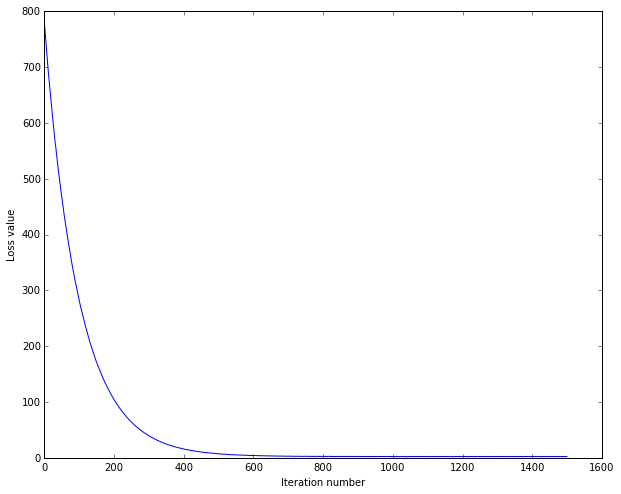

In [6]:
# This was what we implemented together today.
# It's one possible way of finding the optimal hyperperameters.

learning_rates = [1e-6, 1e-7]
regularizations = [5e4, 5e5]

best_svm = None
best_hist = None
best_loss = 100
best_reg = 0.0
best_lr = 0.0

for lr in learning_rates:
    for reg in regularizations:
        svm = LinearSVM()
        print "Starting training with reg: %e, lr: %e ..." % (reg, lr)
        loss_hist = svm.train(X, y, learning_rate=lr, reg=reg, num_iters=1500, verbose=False)
        
        print "loss was: %f\n" % (loss_hist[-1])
        if(loss_hist[-1] < best_loss):
            best_svm = svm
            best_hist = loss_hist
            best_loss = loss_hist[-1]
            best_reg = reg
            best_lr = lr

plt.plot(best_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
print "Best loss was: %f, Using reg: %e and lr: %e" % (best_loss, best_reg, best_lr)